<a href="https://colab.research.google.com/github/Hammadtahir7/Card-Fraud-Detection/blob/master/CCFD_ECD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ECD.csv to ECD.csv


In [2]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['ECD.csv']),header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,162183.0,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,0.634425,-0.471390,-0.349233,-0.073474,-0.303130,-0.664254,0.977499,0.157691,0.469860,0.446847,-0.502306,-0.232666,0.197782,0.741141,-0.009744,-0.085057,0.228384,-0.097292,-0.001028,-0.032390,2.99,0.0
1,120967.0,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,0.477999,0.046959,-1.314079,0.508379,0.891406,0.081326,0.065139,0.109356,-0.623472,-0.671603,0.435948,-0.125804,-0.336497,-0.838932,0.275173,0.049145,-0.156765,0.205919,-0.072321,-0.059009,1.98,0.0
2,26484.0,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,1.750710,-4.171672,-0.583742,0.346628,-0.719006,-0.899347,0.006643,-1.784000,1.457844,-0.952985,-1.315135,3.944592,1.371671,1.195815,4.188762,-1.091077,1.033044,0.224493,-0.486741,0.194275,1937.66,0.0
3,65751.0,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,-1.910354,0.252497,0.922508,-0.114149,1.008346,-0.282106,-0.246635,1.345463,-0.401365,-0.993434,1.474268,0.977739,-0.065082,-0.761357,0.641524,-0.568974,-0.053164,-0.690995,-0.228630,-0.157254,320.05,0.0
4,137025.0,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,0.492435,-0.455964,0.028435,-0.329083,-0.552349,-1.568433,-0.440477,-0.296621,0.481656,-0.061843,-0.387865,-0.014550,0.008303,0.534602,0.089602,0.667918,0.017798,0.611584,-0.469946,-0.514370,11.50,0.0


In [37]:
df2[df2.columns[30]].value_counts()

0.0    4920
1.0     492
Name: 30, dtype: int64

In [0]:
features =df2.drop(df2.columns[30],axis=1)
labels=df2[df2.columns[30]]


In [4]:
import numpy as np
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[0.00e+00 1.00e+00]
 [4.92e+03 4.92e+02]]


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
features = scaler.fit_transform(features)
print(features[0])

X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.2, random_state=42)

#X_train=X_train.astype('float32')
#X_test=X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[ 1.45094259  0.80223991 -0.06502102 -0.33078773  0.04703112  0.20079889
 -0.93863499  0.25309466 -0.18275693  0.58255806  0.02030165 -0.4191561
  0.19984054 -0.28898097 -0.01702708  1.08823192  0.28239682  0.35878101
  0.47503238 -0.63500995 -0.34422048  0.10376635  0.9152007  -0.00556151
 -0.14503745  0.42723258 -0.21816581 -0.02726437 -0.13146827 -0.37888298]
(4329, 30)
(1083, 30)
(4329,)
(1083,)


In [40]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [990  93]]


In [6]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()

In [0]:
from sklearn import svm
model_svm = svm.SVC(probability=True)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1,30)))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.layers import Conv2D, Flatten
#create model
model_2dcnn = Sequential()
#add model layers
model_2dcnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(5,6,1)))
model_2dcnn.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2dcnn.add(Flatten())
model_2dcnn.add(Dense(1, activation='sigmoid'))
model_2dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model_ann=Sequential()
model_ann.add(Dense(200,input_shape=(30,),activation='relu'))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

model_1dcnn = Sequential()
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1,30)))
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model_1dcnn.add(Dropout(0.5))
model_1dcnn.add(MaxPooling1D(pool_size=1))
model_1dcnn.add(Flatten())
model_1dcnn.add(Dense(100, activation='relu'))
model_1dcnn.add(Dense(1, activation='sigmoid'))
model_1dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [13]:
model_lstm.fit(X_train.reshape(4329,1,30), y_train, validation_data=(X_test.reshape(1083,1,30), y_test), epochs=10)




Train on 4329 samples, validate on 1083 samples
Epoch 1/10





4329/4329 [==============================] - 2s 426us/step - loss: 0.4286 - acc: 0.9596 - val_loss: 0.1885 - val_acc: 0.9834
Epoch 2/10
4329/4329 [==============================] - 0s 109us/step - loss: 0.1106 - acc: 0.9822 - val_loss: 0.0793 - val_acc: 0.9843
Epoch 3/10
4329/4329 [==============================] - 0s 104us/step - loss: 0.0652 - acc: 0.9838 - val_loss: 0.0712 - val_acc: 0.9834
Epoch 4/10
4329/4329 [==============================] - 0s 110us/step - loss: 0.0555 - acc: 0.9859 - val_loss: 0.0710 - val_acc: 0.9834
Epoch 5/10
4329/4329 [==============================] - 0s 110us/step - loss: 0.0506 - acc: 0.9871 - val_loss: 0.0713 - val_acc: 0.9825
Epoch 6/10
4329/4329 [==============================] - 0s 108us/step - loss: 0.0471 - acc: 0.9866 - val_loss: 0.0711 - val_acc: 0.9834
Epoch 7/10
4329/4329 [==============================] - 0s 108us/step - loss: 0.0449 - acc: 0.9875 - val_loss: 0.0711 - val_acc:

In [14]:
model_2dcnn.fit(X_train.reshape(4329,5,6,1), y_train, validation_data=(X_test.reshape(1083,5,6,1), y_test), epochs=10)

Train on 4329 samples, validate on 1083 samples
Epoch 1/10
4329/4329 [==============================] - 1s 221us/step - loss: 0.1371 - acc: 0.9716 - val_loss: 0.0748 - val_acc: 0.9815
Epoch 2/10
4329/4329 [==============================] - 0s 105us/step - loss: 0.0590 - acc: 0.9854 - val_loss: 0.0697 - val_acc: 0.9852
Epoch 3/10
4329/4329 [==============================] - 0s 100us/step - loss: 0.0533 - acc: 0.9861 - val_loss: 0.0674 - val_acc: 0.9861
Epoch 4/10
4329/4329 [==============================] - 0s 98us/step - loss: 0.0497 - acc: 0.9859 - val_loss: 0.0657 - val_acc: 0.9871
Epoch 5/10
4329/4329 [==============================] - 0s 100us/step - loss: 0.0456 - acc: 0.9871 - val_loss: 0.0683 - val_acc: 0.9852
Epoch 6/10
4329/4329 [==============================] - 0s 92us/step - loss: 0.0450 - acc: 0.9873 - val_loss: 0.0677 - val_acc: 0.9843
Epoch 7/10
4329/4329 [==============================] - 0s 92us/step - loss: 0.0429 - acc: 0.9871 - val_loss: 0.0730 - val_acc: 0.9834
Epo

In [15]:
model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 4329 samples, validate on 1083 samples
Epoch 1/10
4329/4329 [==============================] - 1s 155us/step - loss: 0.1924 - acc: 0.9506 - val_loss: 0.0824 - val_acc: 0.9843
Epoch 2/10
4329/4329 [==============================] - 0s 48us/step - loss: 0.0624 - acc: 0.9850 - val_loss: 0.0727 - val_acc: 0.9834
Epoch 3/10
4329/4329 [==============================] - 0s 50us/step - loss: 0.0521 - acc: 0.9871 - val_loss: 0.0704 - val_acc: 0.9825
Epoch 4/10
4329/4329 [==============================] - 0s 49us/step - loss: 0.0473 - acc: 0.9878 - val_loss: 0.0695 - val_acc: 0.9815
Epoch 5/10
4329/4329 [==============================] - 0s 49us/step - loss: 0.0443 - acc: 0.9871 - val_loss: 0.0681 - val_acc: 0.9852
Epoch 6/10
4329/4329 [==============================] - 0s 47us/step - loss: 0.0419 - acc: 0.9884 - val_loss: 0.0682 - val_acc: 0.9843
Epoch 7/10
4329/4329 [==============================] - 0s 49us/step - loss: 0.0394 - acc: 0.9889 - val_loss: 0.0672 - val_acc: 0.9843
Epoch 

In [16]:
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
model_1dcnn.fit(X_train.reshape(4329,1,30), y_train, validation_data=(X_test.reshape(1083,1,30), y_test), epochs=10)

Train on 4329 samples, validate on 1083 samples
Epoch 1/10
4329/4329 [==============================] - 1s 228us/step - loss: 0.1933 - acc: 0.9466 - val_loss: 0.0863 - val_acc: 0.9825
Epoch 2/10
4329/4329 [==============================] - 0s 66us/step - loss: 0.0626 - acc: 0.9841 - val_loss: 0.0831 - val_acc: 0.9834
Epoch 3/10
4329/4329 [==============================] - 0s 68us/step - loss: 0.0579 - acc: 0.9845 - val_loss: 0.0771 - val_acc: 0.9834
Epoch 4/10
4329/4329 [==============================] - 0s 65us/step - loss: 0.0504 - acc: 0.9868 - val_loss: 0.0852 - val_acc: 0.9834
Epoch 5/10
4329/4329 [==============================] - 0s 69us/step - loss: 0.0471 - acc: 0.9875 - val_loss: 0.0824 - val_acc: 0.9843
Epoch 6/10
4329/4329 [==============================] - 0s 65us/step - loss: 0.0436 - acc: 0.9878 - val_loss: 0.0837 - val_acc: 0.9834
Epoch 7/10
4329/4329 [==============================] - 0s 67us/step - loss: 0.0429 - acc: 0.9889 - val_loss: 0.0844 - val_acc: 0.9852
Epoch 

In [0]:
y_pred_svm=model_svm.predict(X_test)
y_pred_rf=model_rf.predict(X_test)
y_pred_1dcnn=model_1dcnn.predict_classes(X_test.reshape(1083,1,30))
y_pred_2dcnn=model_2dcnn.predict_classes(X_test.reshape(1083,5,6,1))
y_pred_lstm=model_lstm.predict_classes(X_test.reshape(1083,1,30))
y_pred_ann=model_ann.predict_classes(X_test)

In [48]:
unique_elements, counts_elements = np.unique(y_pred_2dcnn, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [996  87]]


In [20]:
y_pred=model_lstm.predict_classes(X_test.reshape(1083,1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X_test.reshape(1083,5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X_test),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X_test).reshape(1083,1),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X_test).reshape(1083,1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X_test.reshape(1083,1,30)),axis=1)
print(y_pred.shape)

(1083, 6)


In [0]:
header=['LSTM','2DCNN','ANN','SVM','RF','1DCNN']

In [22]:
from sklearn import metrics

for x in range (len(y_pred[0])):
  print(header[x])
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred[:,x])))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y_test, y_pred[:,x])))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y_test, y_pred[:,x])))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y_test,y_pred[:,x])))
  print(metrics.confusion_matrix(y_test,y_pred[:,x]))
  print("-----------")

LSTM
Accuracy: 98.52%
Precision: 97.53%
Recall: 84.95%
F1: 90.80%
[[988   2]
 [ 14  79]]
-----------
2DCNN
Accuracy: 98.34%
Precision: 93.10%
Recall: 87.10%
F1: 90.00%
[[984   6]
 [ 12  81]]
-----------
ANN
Accuracy: 98.52%
Precision: 95.29%
Recall: 87.10%
F1: 91.01%
[[986   4]
 [ 12  81]]
-----------
SVM
Accuracy: 98.25%
Precision: 97.44%
Recall: 81.72%
F1: 88.89%
[[988   2]
 [ 17  76]]
-----------
RF
Accuracy: 98.43%
Precision: 97.50%
Recall: 83.87%
F1: 90.17%
[[988   2]
 [ 15  78]]
-----------
1DCNN
Accuracy: 98.34%
Precision: 94.12%
Recall: 86.02%
F1: 89.89%
[[985   5]
 [ 13  80]]
-----------


In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

lr_probs_svm = model_svm.predict_proba(X_test)[:,1]
lr_probs_rf =model_rf.predict_proba(X_test)[:,1]
lr_probs_lstm=model_lstm.predict_proba(X_test.reshape(1083,1,30)).reshape(1083)
lr_probs_1dcnn=model_1dcnn.predict_proba(X_test.reshape(1083,1,30)).reshape(1083)
lr_probs_2dcnn=model_2dcnn.predict_proba(X_test.reshape(1083,5,6,1)).reshape(1083)
lr_probs_ann=model_ann.predict_proba(X_test).reshape(1083)


In [24]:
lr_precision_svm, lr_recall_svm, _ = precision_recall_curve(y_test, lr_probs_svm)
lr_f1_svm, lr_auc_svm = f1_score(y_test, y_pred_svm), auc(lr_recall_svm, lr_precision_svm)

lr_precision_rf, lr_recall_rf, _ = precision_recall_curve(y_test, lr_probs_rf)
lr_f1_rf, lr_auc_rf = f1_score(y_test, y_pred_rf), auc(lr_recall_rf, lr_precision_rf)

lr_precision_lstm, lr_recall_lstm, _ = precision_recall_curve(y_test, lr_probs_lstm)
lr_f1_lstm, lr_auc_lstm = f1_score(y_test, y_pred_lstm), auc(lr_recall_lstm, lr_precision_lstm)

lr_precision_1dcnn, lr_recall_1dcnn, _ = precision_recall_curve(y_test, lr_probs_1dcnn)
lr_f1_1dcnn, lr_auc_1dcnn = f1_score(y_test, y_pred_1dcnn), auc(lr_recall_1dcnn, lr_precision_1dcnn)

lr_precision_2dcnn, lr_recall_2dcnn, _ = precision_recall_curve(y_test, lr_probs_2dcnn)
lr_f1_2dcnn, lr_auc_2dcnn = f1_score(y_test, y_pred_2dcnn), auc(lr_recall_2dcnn, lr_precision_2dcnn)

lr_precision_ann, lr_recall_ann, _ = precision_recall_curve(y_test, lr_probs_ann)
lr_f1_ann, lr_auc_ann = f1_score(y_test, y_pred_ann), auc(lr_recall_ann, lr_precision_ann)

print("{:.2%}".format(lr_f1_ann))
print("{:.2%}".format(lr_auc_ann))

91.01%
92.75%


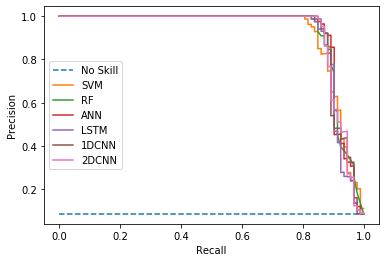

<Figure size 28800x28800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall_svm, lr_precision_svm, 'C1', label='SVM')
pyplot.plot(lr_recall_rf, lr_precision_rf, 'C2', label='RF')
pyplot.plot(lr_recall_ann, lr_precision_ann, 'C3', label='ANN')
pyplot.plot(lr_recall_lstm, lr_precision_lstm, 'C4', label='LSTM')
pyplot.plot(lr_recall_1dcnn, lr_precision_1dcnn, 'C5', label='1DCNN')
pyplot.plot(lr_recall_2dcnn, lr_precision_2dcnn, 'C6', label='2DCNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
pyplot.figure(figsize=(400,400))
# show the plot
pyplot.show()
pyplot.savefig("Fig.jpg")
files.download("Fig.jpg")


In [31]:
fig = pyplot.figure(figsize=(10, 10))
fig.show()
fig.savefig("Fig.jpg", bbox_inches='tight')
files.download("Fig.jpg")

<Figure size 720x720 with 0 Axes>

In [0]:
import statistics
y=[]
for rows in y_pred:
  y=np.append(y,statistics.mode(rows))

In [0]:
y_pred=y.reshape(1083,1)
print(y_pred.shape)

(1083, 1)


In [0]:
from sklearn import metrics
print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred)));
print("Precision: "+"{:.2%}".format(metrics.precision_score(y_test, y_pred)));
print("Recall: "+"{:.2%}".format(metrics.recall_score(y_test, y_pred)));
print("F1: "+"{:.2%}".format(metrics.f1_score(y_test,y_pred)));
print(metrics.confusion_matrix(y_test,y_pred));

Accuracy: 98.43%
Precision: 96.34%
Recall: 84.95%
F1: 90.29%
[[987   3]
 [ 14  79]]
